# 00 - Data Exploration and EDA

## Learning Objectives
- Understand the disaster tweets dataset structure
- Explore text characteristics and patterns
- Identify data quality issues and preprocessing needs
- Build intuition about the classification task

## Phase 1: PyTorch Fundamentals 🧠
*Build everything from scratch to understand the foundations*

## Phase 2: Transformers Enhancement 🚀
*Enhance with modern NLP tools after mastering fundamentals*

---

## Dataset Overview

**Competition**: [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started)

**Task**: Binary classification - predict if a tweet is about a real disaster (1) or not (0)

**Files**:
- `train.csv` - Training data with labels
- `test.csv` - Test data for submission (no labels)

**Key Columns**:
- `id` - Unique identifier
- `text` - Tweet content
- `target` - Label (1=disaster, 0=not disaster)


## TODO 1: Load and Inspect Data

**Goal**: Load the dataset and perform basic inspection

**Steps**:
1. Import necessary libraries (pandas, numpy, matplotlib, seaborn)
2. Load `train.csv` and `test.csv` from `data/raw/`
3. Display basic dataset information:
   - Shape (number of rows and columns)
   - Column names and data types
   - First few rows
   - Memory usage

**Hint**: Use `pd.read_csv()`, `df.info()`, `df.head()`, and `df.memory_usage()`

**Expected Output**: Understanding of dataset size and structure


In [11]:
# TODO 1: Load and inspect data
# Your implementation here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

df = pd.read_csv('../data/raw/train.csv')
df.info()
df.memory_usage()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


## TODO 2: Target Distribution Analysis

**Goal**: Understand the class distribution and balance

**Steps**:
1. Analyze target distribution:
   - Count of each class (0 vs 1)
   - Percentage distribution
   - Visualize with bar chart
2. Check for any missing values in target column
3. Analyze class balance implications for modeling

**Hint**: Use `df['target'].value_counts()`, `df['target'].value_counts(normalize=True)`, and `sns.countplot()`

**Expected Output**: Understanding of whether the dataset is balanced and potential impact on model training


In [17]:
# TODO 2: Target distribution analysis
# Your implementation here
number_of_disasters = df['target'].value_counts()[1]
number_of_non_disasters = df['target'].value_counts()[0]
print(f"Number of disasters: {number_of_disasters}")
print(f"Number of non-disasters: {number_of_non_disasters}")
print(f"Percentage of disasters: {round(number_of_disasters / (number_of_disasters + number_of_non_disasters), 2) * 100}%")
print(f"Percentage of non-disasters: {round(number_of_non_disasters / (number_of_disasters + number_of_non_disasters) * 100, 2)}%")





Number of disasters: 3271
Number of non-disasters: 4342
Percentage of disasters: 43.0%
Percentage of non-disasters: 57.03%


## TODO 3: Text Length Analysis

**Goal**: Understand text characteristics and length patterns

**Steps**:
1. Calculate text length statistics:
   - Character count per tweet
   - Word count per tweet
   - Sentence count per tweet
2. Visualize length distributions:
   - Histograms for character and word counts
   - Box plots by target class
3. Identify outliers and potential preprocessing needs

**Hint**: Use `df['text'].str.len()`, `df['text'].str.split().str.len()`, and matplotlib/seaborn for visualization

**Expected Output**: Understanding of text length patterns and preprocessing requirements


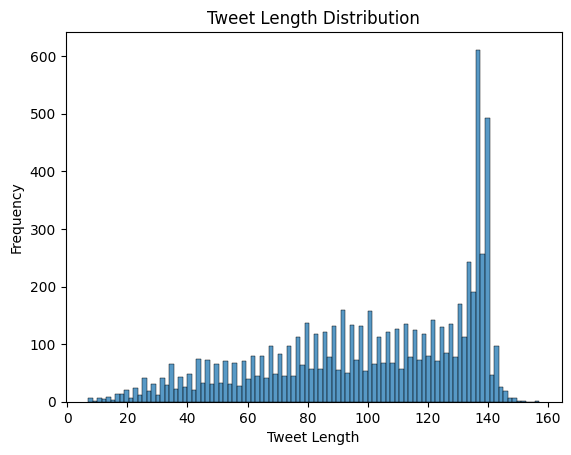

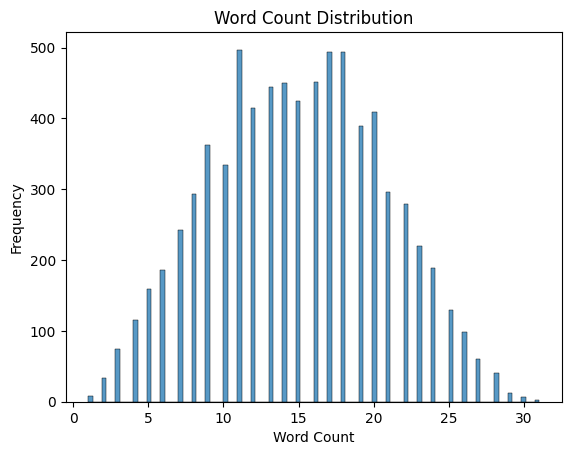

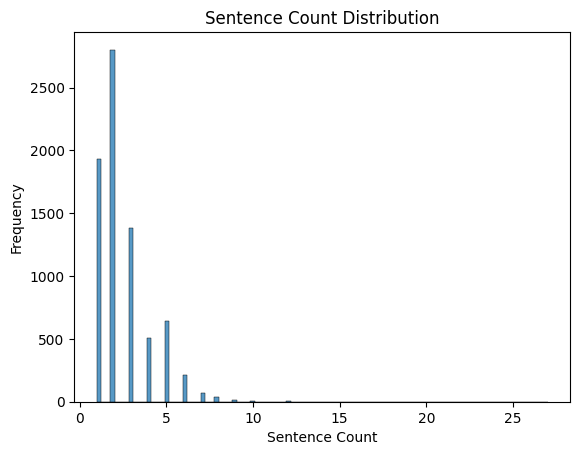

In [19]:
# TODO 3: Text length analysis
# Your implementation here
df["tweet_length"] = df["text"].str.len()
df["word_count"] = df["text"].str.split().str.len()
df["sentence_count"] = df["text"].str.split(".").str.len()

sns.histplot(df["tweet_length"], bins=100)
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df["word_count"], bins=100)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df["sentence_count"], bins=100)
plt.title("Sentence Count Distribution")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.show()

## TODO 4: Word Frequency Analysis

**Goal**: Identify common words and patterns in disaster vs non-disaster tweets

**Steps**:
1. Create word frequency analysis:
   - Most common words overall
   - Most common words by class (disaster vs non-disaster)
   - Word clouds for visual representation
2. Analyze differences between classes:
   - Words unique to disaster tweets
   - Words unique to non-disaster tweets
   - Statistical significance of word differences

**Hint**: Use `Counter`, `collections`, and `wordcloud` library for visualization

**Expected Output**: Understanding of vocabulary patterns that might help classification


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/franciscoteixeirabarbosa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('like', 341), ('get', 227), ('new', 215), ('via', 214), ('fire', 209), ('one', 179), ('people', 174), ('emergency', 141), ('would', 128), ('still', 127), ('police', 126), ('disaster', 122), ('body', 118), ('video', 114), ('got', 111), ('burning', 111), ('suicide', 109), ('back', 107), ('first', 104), ('know', 103)]
[('fire', 151), ('via', 117), ('suicide', 103), ('disaster', 97), ('police', 94), ('people', 93), ('killed', 92), ('like', 91), ('california', 88), ('families', 81), ('two', 71), ('storm', 71), ('train', 71), ('bomb', 67), ('emergency', 66), ('get', 66), ('crash', 65), ('one', 63), ('nuclear', 63), ('bombing', 63)]
[('like', 250), ('new', 163), ('get', 161), ('one', 116), ('body', 106), ('via', 97), ('would', 94), ('love', 85), ('got', 82), ('people', 81), ('full', 81), ('see', 79), ('know', 78), ('video', 76), ('back', 75), ('emergency', 75), ('going', 73), ('still', 70), ('time', 69), ('want', 65)]


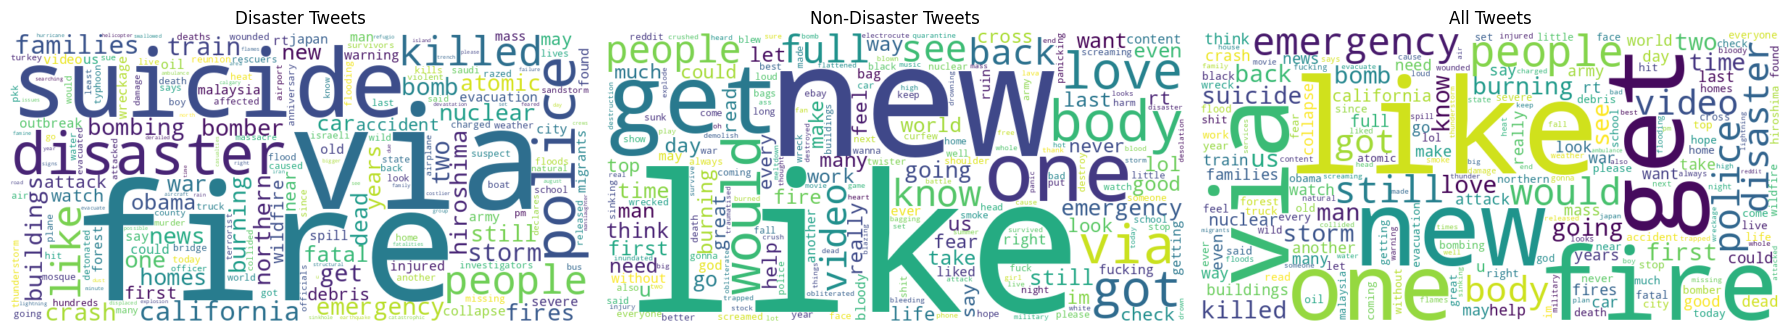

In [33]:
# TODO 4: Word frequency analysis
# Your implementation here. isalpha() is used to remove punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
overall_common_words = Counter(word for word in df['text'].str.lower().str.split().explode() if word.isalpha())
disaster_common_words = Counter(word for word in df[df['target'] == 1]['text'].str.lower().str.split().explode() if word.isalpha())
non_disaster_common_words = Counter(word for word in df[df['target'] == 0]['text'].str.lower().str.split().explode() if word.isalpha())

# Remove stopwords
stop_words = set(stopwords.words('english'))
overall_common_words = {word: count for word, count in overall_common_words.items() if word not in stop_words}
disaster_common_words = {word: count for word, count in disaster_common_words.items() if word not in stop_words}
non_disaster_common_words = {word: count for word, count in non_disaster_common_words.items() if word not in stop_words}

print(sorted(overall_common_words.items(), key=lambda x: x[1], reverse=True)[:20])
print(sorted(disaster_common_words.items(), key=lambda x: x[1], reverse=True)[:20])
print(sorted(non_disaster_common_words.items(), key=lambda x: x[1], reverse=True)[:20])

# Create word clouds
from wordcloud import WordCloud

# Create word clouds for each class

# It's possible that some frequency dicts are empty, so protect against that
if disaster_common_words:
    wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disaster_common_words)
else:
    wordcloud_disaster = None

if non_disaster_common_words:
    wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(non_disaster_common_words)
else:
    wordcloud_non_disaster = None

if overall_common_words:
    wordcloud_overall = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(overall_common_words)
else:
    wordcloud_overall = None

# Display the word clouds
plt.figure(figsize=(18, 6))

# Disaster
plt.subplot(1, 3, 1)
if wordcloud_disaster:
    plt.imshow(wordcloud_disaster, interpolation='bilinear')
    plt.title("Disaster Tweets")
    plt.axis("off")
else:
    plt.text(0.5, 0.5, "No words available", ha='center', va='center')
    plt.axis("off")

# Non-disaster
plt.subplot(1, 3, 2)
if wordcloud_non_disaster:
    plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
    plt.title("Non-Disaster Tweets")
    plt.axis("off")
else:
    plt.text(0.5, 0.5, "No words available", ha='center', va='center')
    plt.axis("off")

# Overall
plt.subplot(1, 3, 3)
if wordcloud_overall:
    plt.imshow(wordcloud_overall, interpolation='bilinear')
    plt.title("All Tweets")
    plt.axis("off")
else:
    plt.text(0.5, 0.5, "No words available", ha='center', va='center')
    plt.axis("off")

plt.tight_layout()
plt.show()




## TODO 5: Data Quality Assessment

**Goal**: Identify data quality issues and preprocessing requirements

**Steps**:
1. Check for missing values in all columns
2. Identify duplicate tweets
3. Analyze special characters and URLs:
   - Count of URLs per tweet
   - Count of hashtags, mentions, emojis
   - Special character patterns
4. Sample and manually review examples from each class

**Hint**: Use `df.isnull().sum()`, `df.duplicated().sum()`, and regex patterns for special characters

**Expected Output**: List of data quality issues and preprocessing steps needed


In [39]:
# TODO 5: Data quality assessment
# Your implementation here
# Missing values
print("Missing values: ", df.isnull().sum())

# Duplicates
print("Duplicates: ", df.duplicated().sum())

# Special characters


df["number_urls"] = df["text"].str.count(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
df["number_hashtags"] = df["text"].str.count(r"#")
df["number_mentions"] = df["text"].str.count(r"@")
import emoji

# Define a function to count emojis in a string
def count_emojis(text):
    if not isinstance(text, str):
        return 0
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

df["number_emojis"] = df["text"].apply(count_emojis)

# Average number of urls, hashtags, mentions, and emojis per tweet
print(f"Average number of urls per tweet: {df['number_urls'].mean()}")
print(f"Average number of hashtags per tweet: {df['number_hashtags'].mean()}")
print(f"Average number of mentions per tweet: {df['number_mentions'].mean()}")
print(f"Average number of emojis per tweet: {df['number_emojis'].mean()}")





Missing values:  id                    0
keyword              61
location           2533
text                  0
target                0
tweet_length          0
word_count            0
sentence_count        0
number_urls           0
number_hashtags       0
number_mentions       0
number_emojis         0
dtype: int64
Duplicates:  0
Average number of urls per tweet: 0.6201234730066991
Average number of hashtags per tweet: 0.4469985551031131
Average number of mentions per tweet: 0.36240641008800734
Average number of emojis per tweet: 0.0013135426244581636


## TODO 6: Key Insights and Next Steps

**Goal**: Synthesize findings and plan preprocessing strategy

**Steps**:
1. Summarize key findings from exploration:
   - Dataset characteristics
   - Class distribution insights
   - Text length patterns
   - Vocabulary differences
   - Data quality issues
2. Document preprocessing requirements:
   - Text cleaning steps needed
   - Tokenization strategy
   - Vocabulary size considerations
   - Sequence length decisions
3. Plan train/validation/test split strategy

**Expected Output**: Clear roadmap for preprocessing phase

---

## Phase 2: Transformers Enhancement

*After completing Phase 1, consider these enhancements:*

- Use HuggingFace datasets for efficient data loading
- Leverage pre-trained tokenizers (BERT, RoBERTa)
- Compare custom preprocessing vs. transformer tokenization
- Analyze how transformer tokenization handles special characters differently
